In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()



Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4967 - accuracy: 0.8267 - val_loss: 0.4587 - val_accuracy: 0.8317
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3771 - accuracy: 0.8639 - val_loss: 0.3871 - val_accuracy: 0.8619
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3410 - accuracy: 0.8752 - val_loss: 0.3723 - val_accuracy: 0.8655
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8852 - val_loss: 0.3570 - val_accuracy: 0.8708
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2996 - accuracy: 0.8890 - val_loss: 0.3458 - val_accuracy: 0.8747
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2816 - accuracy: 0.8956 - val_loss: 0.3776 - val_accuracy: 0.8626
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2715 - accuracy: 0.8996 - val_loss: 0.3402 - val_accurac

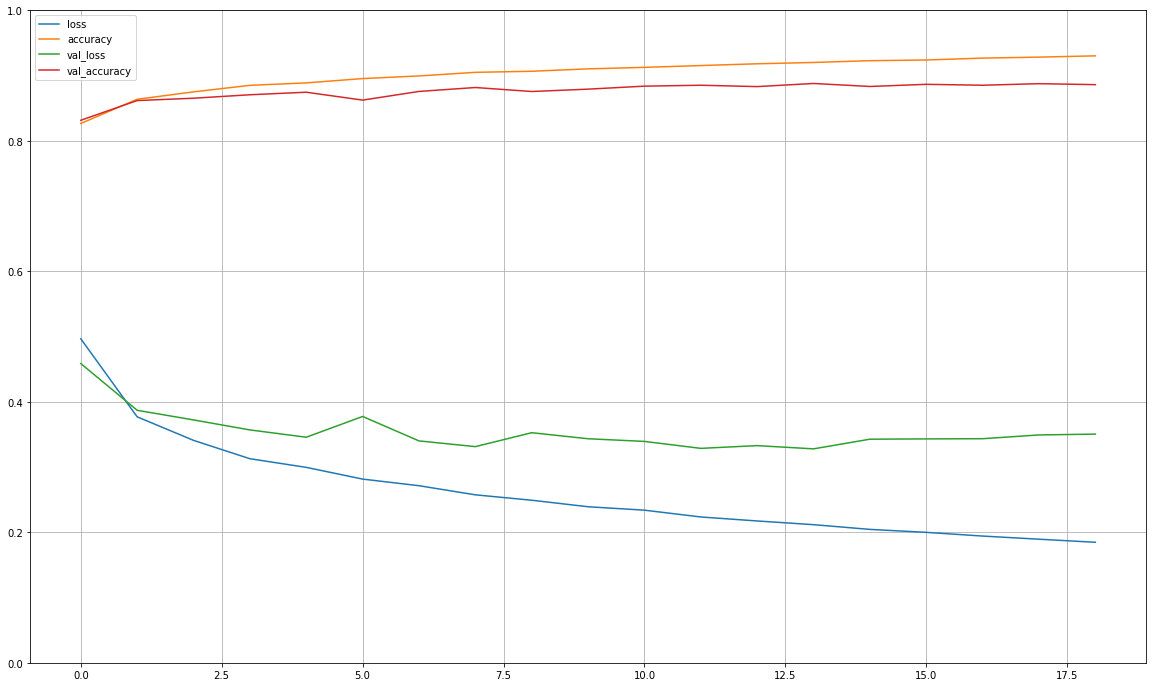

In [2]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

layers = [tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]

model = tf.keras.models.Sequential(layers)

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')

test_data = (test_images, test_labels)
history = model.fit(training_images, training_labels, epochs=50, validation_data=test_data, callbacks = [callback])

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(20,12))
plt.grid(True)

plt.gca().set_ylim(0,1)
plt.show()